In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [9]:
train_data_dir='train'

In [10]:
validation_data_dir='test'

In [11]:
train_datagen=ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [12]:
validation_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
train_generator=train_datagen.flow_from_directory(
train_data_dir,
color_mode='grayscale',
target_size=(48,48),
batch_size=32,
class_mode='categorical',
shuffle=True)

Found 28705 images belonging to 7 classes.


In [14]:
validation_generator=validation_datagen.flow_from_directory(
validation_data_dir,
color_mode='grayscale',
target_size=(48,48),
batch_size=32,
class_mode='categorical',
shuffle=True)

Found 7178 images belonging to 7 classes.


In [15]:
class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [16]:
img,label=train_generator.__next__()

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

In [19]:
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

In [20]:
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

In [21]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

In [22]:
model.add(Dense(7,activation='softmax'))

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [25]:
train_path='C:/Users/dhana/Downloads/facetrain/train'
test_path='C:/Users/dhana/Downloads/facetrain/test'

In [26]:
num_train_imgs=0
for root,dirs,files in os.walk(train_path):
    num_train_imgs+=len(files)

In [27]:
num_test_imgs=0
for root,dirs,files in os.walk(test_path):
    num_test_imgs+=len(files)

In [28]:
print(num_train_imgs)
print(num_test_imgs)

28705
7178


In [22]:
epochs=80
history=model.fit(train_generator,
                 steps_per_epoch=num_train_imgs//32,
                 epochs=epochs,
                 validation_data=validation_generator,
                 validation_steps=num_test_imgs//32)
model.save('Emotion_Detection.h5')

Epoch 1/80
897/897 [==============================] - 192s 213ms/step - loss: 1.7766 - accuracy: 0.2670 - val_loss: 1.6933 - val_accuracy: 0.3171
Epoch 2/80
897/897 [==============================] - 179s 200ms/step - loss: 1.6578 - accuracy: 0.3363 - val_loss: 1.4868 - val_accuracy: 0.4268
Epoch 3/80
897/897 [==============================] - 193s 215ms/step - loss: 1.5288 - accuracy: 0.4026 - val_loss: 1.3413 - val_accuracy: 0.4845
Epoch 4/80
897/897 [==============================] - 182s 203ms/step - loss: 1.4438 - accuracy: 0.4412 - val_loss: 1.2953 - val_accuracy: 0.5066
Epoch 5/80
897/897 [==============================] - 181s 202ms/step - loss: 1.3960 - accuracy: 0.4607 - val_loss: 1.2397 - val_accuracy: 0.5301
Epoch 6/80
897/897 [==============================] - 182s 203ms/step - loss: 1.3573 - accuracy: 0.4763 - val_loss: 1.2054 - val_accuracy: 0.5410
Epoch 7/80
897/897 [==============================] - 182s 203ms/step - loss: 1.3199 - accuracy: 0.4918 - val_loss: 1.1928 -

NameError: name 'history' is not defined

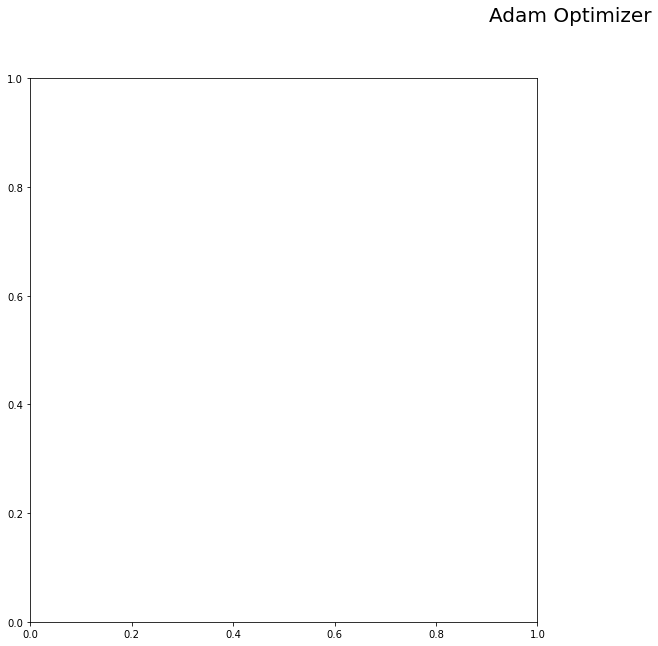

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Adam Optimizer',fontsize=20)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.ylabel("Accuracy",fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.show()

In [1]:
import cv2
import numpy as np
from keras.models import load_model

In [2]:
model=load_model('Emotion_Detection.h5')

In [3]:
faceDetect=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [4]:
labels_dict={0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [5]:
frame = cv2.imread("train/surprise/Training_99794165.jpg")
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces = faceDetect.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=3)
for x,y,w,h in faces:
    sub_face_img=gray[y:y+h,x:x+w]
    resized=cv2.resize(sub_face_img,(48,48))
    normalize=resized/255.0
    reshaped=np.reshape(normalize,(1,48,48,1))
    result=model.predict(reshaped)
    label=np.argmax(result,axis=1)[0]
    print(label)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),1)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(50,50,255),2)
    cv2.rectangle(frame,(x,y-40),(x+w,y+h),(50,50,255),-1)
    cv2.putText(frame,label_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    
    cv2.imshow("Frame",frame)
    cv2.waitkey(0)
    cv2.destroyAllWindows()

In [6]:
pic_size = 48
b_path = "C:\\Users\\dhana\\Downloads\\facetrain"

In [7]:
from keras.preprocessing.image import load_img

class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

plt.figure(0, figsize=(20, 20))
cpt = 0

for expression in os.listdir(os.path.join(b_path, "train")):
    for i in range(1, 8):
        cpt += 1
        plt.subplot(7, 8, cpt)
        img_filename = os.listdir(os.path.join(b_path, "train", expression))[i]
        img = load_img(os.path.join(b_path, "train", expression, img_filename), target_size=(pic_size, pic_size))
        plt.imshow(img, cmap='gray')
        plt.xlabel(class_labels[class_labels.index(expression.title())])  # Use the expression index as the label
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [40]:
# Load the trained model for real-time prediction
model_path = 'Emotion_Detection.h5'
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
model = load_model(model_path)

def predict_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48))
        face = np.reshape(face, (1, 48, 48, 1))
        face = face / 255.0  # Normalize the image
        
        prediction = model.predict(face)
        emotion_label = emotion_labels[np.argmax(prediction)]
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    return frame

In [41]:
import numpy as np
import cv2
from keras.models import load_model

# Load the trained model
model_path = 'Emotion_Detection.h5'
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
model = load_model(model_path)

# Initialize the webcam
cap = cv2.VideoCapture(0)  # 0 for default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48))
        face = np.reshape(face, (1, 48, 48, 1))
        face = face / 255.0  # Normalize the image
        
        prediction = model.predict(face)
        emotion_label = emotion_labels[np.argmax(prediction)]
        
        label = "Facial Expression: " + emotion_label
        
        # Display emotion label at the top left of the detected face
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    cv2.imshow('Facial Expression Recognition', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 47ms/step
